# Function defs

Esta tabla contiene la información de las definiciones de funciones.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('functiondefs')

# Table name, features and target.
TABLE_NAME = 'functiondefs'
TABLE_FEATURES = ['functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct', 'functiondef__expertise_level']
TABLE_TARGET = 'functiondef__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2025-01-14 12:05:03.880129 Data cache files found ...
2025-01-14 12:05:03.897099 Data cache files successfully loaded!!
Features shape: (15857, 13)
Target shape: (15857,)
As we can see the downloaded data contains a total of 15857 instances. For each instance we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   functiondef__name_convention             15857 non-null  object 
 1   functiondef__number_of_characters        15857 non-null  int64  
 2   functiondef__is_magic                    15857 non-null  bool   
 3   functiondef__is_private                  15857 non-null  bool   
 4   functiondef__body_count                  15857 non-null  int64  
 5   functiondef__expressions_pct             15857 non-null  float64
 6   functiondef__is_async                    15857 non-null  bool   
 7   functiondef__number_of_decorators        15857 non-null  int64  
 8   functiondef__has_return_type_annotation  15857 non-null  bool   
 9   functiondef__has_doc_string              15857 non-null  bool   
 10  functiondef__height                      15857

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 5 variables boleanas y dos de tipo objeto. 

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for PROFESSIONAL class.")

The dataset contains 62.56% instances for BEGINNER class and 37.44% for PROFESSIONAL class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
functiondef__expertise_level               0
dtype: int64

In [5]:
print_empty_cols(X)

functiondef__name_convention
----------------------------
0 instancias no tienen un valor para la columna functiondef__name_convention


functiondef__number_of_characters
---------------------------------
0 instancias no tienen un valor para la columna functiondef__number_of_characters


functiondef__is_magic
---------------------
0 instancias no tienen un valor para la columna functiondef__is_magic


functiondef__is_private
-----------------------
0 instancias no tienen un valor para la columna functiondef__is_private


functiondef__body_count
-----------------------
0 instancias no tienen un valor para la columna functiondef__body_count


functiondef__expressions_pct
----------------------------
0 instancias no tienen un valor para la columna functiondef__expressions_pct


functiondef__is_async
---------------------
0 instancias no tienen un valor para la columna functiondef__is_async


functiondef__number_of_decorators
---------------------------------
0 instancias no tienen un valo

### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
functiondef__name_convention,15857,6,SnakeCase,9295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,15857.0,NaN,NaN,NaN,15.0881,8.12982,1.0,10.0,14.0,19.0,87.0
functiondef__is_magic,15857,1,False,15857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__is_private,15857,2,False,15181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__body_count,15857.0,NaN,NaN,NaN,4.957117,4.775727,1.0,2.0,4.0,6.0,78.0
functiondef__expressions_pct,15857.0,NaN,NaN,NaN,0.238854,0.263141,0.0,0.0,0.2,0.375,1.0
functiondef__is_async,15857,2,False,15440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_decorators,15857.0,NaN,NaN,NaN,0.102478,0.444049,0.0,0.0,0.0,0.0,10.0
functiondef__has_return_type_annotation,15857,2,False,12005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__has_doc_string,15857,2,False,8744,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 46
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 12), (12, 18), (18, inf)], # min: 1 ; max: 87
    "functiondef__body_count": [(1.0, 1.0), (1.0, 3.0), (3.0, 5.0), (5.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(1.0, 1.0), (1.0, 1.9), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 10
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(X_copy, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
functiondef__expressions_pct  count  percentage
                   [0.0_0.5)   6315   39.824683
                   [0.0_0.0]   6108   38.519266
                   [0.5_1.0)   2823   17.802863
                   [1.0_inf]    611    3.853188

functiondef__number_of_decorators  count  percentage
                        [0.0_0.0]  14701   92.709844
                        [0.0_inf]   1156    7.290156

functiondef__type_annotations_pct  count  percentage
                        [0.0_0.0]  11830   74.604276
                        [1.0_inf]   3888   24.519140
                        [0.0_1.0)    139    0.876584

functiondef__number_of_characters  count  percentage
                          [12_18)   5013   31.613798
                         [18_inf]   4953   31.235417
                         [8.0_12)   3548   22.374976
                        [1.0_8.0)   2343   14.775809

functiondef__body_count  count  percentage
              [5.0_inf]   6076   38.317462
           

### IMPORTANTE
Hay que corregir el doc_string. 

In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (15857, 19)
Target shape: (15857,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

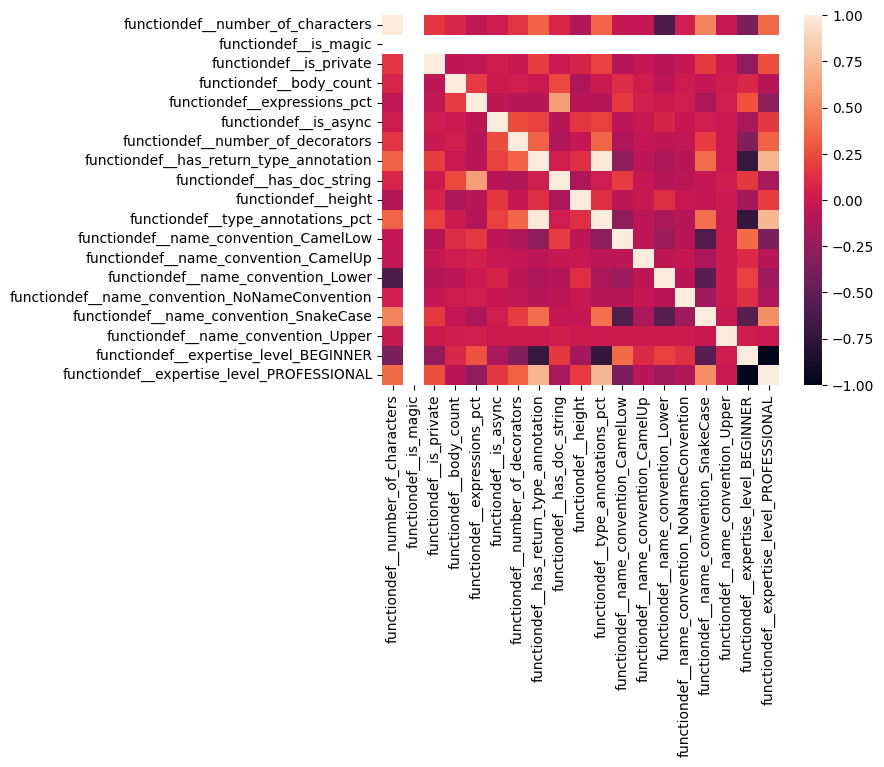

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 12 variables (2 porcentuales, 4 numericas, 5 booleanas y 1 categorica)

### Variable is_private (1/12)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

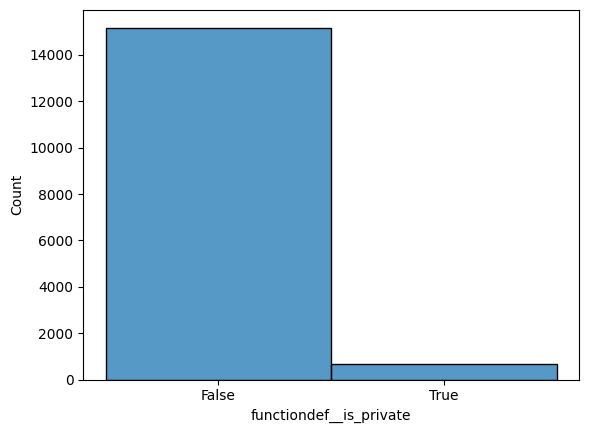

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [11]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 676 valores verdaderos y 15181 valores falsos. Y, la desviación típica es de 0.20203015208244324
La frecuencia con la que programa puede tener la variable is_private a True es 0.04263101469382607.
La frecuencia con la que programa puede tener la variable is_private a False es 0.957368985306174.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 95.74% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 4.263% de los items.


In [13]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,676.000000,676.0,676.0,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.0,676.0,676.0,676.0,676.0,676.0,676.0,676.0
mean,20.647928,0.0,1.0,4.068048,0.173179,0.034024,0.062130,0.634615,0.448225,1.239645,0.660234,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
std,7.402923,0.0,0.0,4.071012,0.205713,0.181424,0.296624,0.481894,0.497680,0.645414,0.464671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25%,16.000000,0.0,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50%,20.000000,0.0,1.0,3.000000,0.087121,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
75%,25.000000,0.0,1.0,5.000000,0.333333,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
max,47.000000,0.0,1.0,35.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Variable is_magic (2/12)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

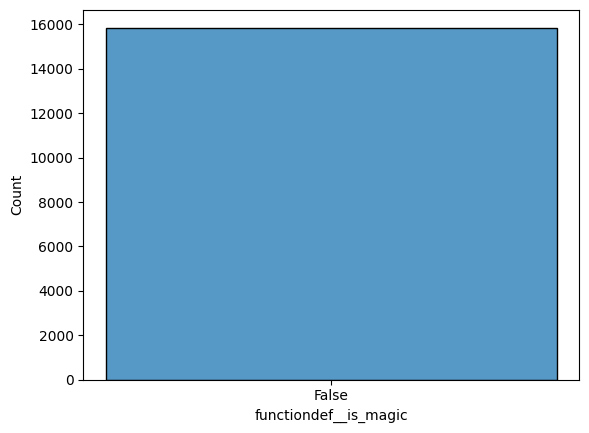

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 0 valores verdaderos y 15857 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_magic a True es 0.0.
La frecuencia con la que programa puede tener la variable is_magic a False es 1.0.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 100.0% de los items.
La variable functiondef__is_magic toma el valor de True en un 0.0% de los items. [OUTLIER]


In [17]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Variable is_async (3/12)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

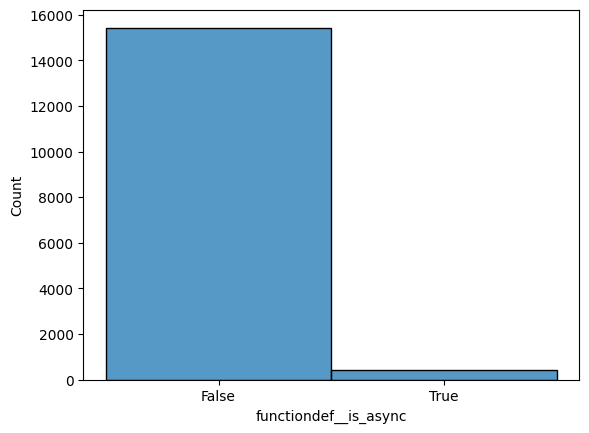

In [18]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [19]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 417 valores verdaderos y 15440 valores falsos. Y, la desviación típica es de 0.16002371907234192
La frecuencia con la que programa puede tener la variable is_async a True es 0.026297534212019927.
La frecuencia con la que programa puede tener la variable is_async a False es 0.97370246578798.


In [20]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 97.37% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 2.63% de los items.


In [21]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,417.000000,417.0,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.00000,417.0,417.000000,417.000000
mean,16.788969,0.0,0.055156,5.110312,0.146606,1.0,0.846523,0.779377,0.177458,1.575540,0.794165,0.021583,0.0,0.326139,0.002398,0.64988,0.0,0.129496,0.870504
std,12.342413,0.0,0.228558,4.690653,0.217167,0.0,1.126791,0.415165,0.382515,1.014167,0.403392,0.145491,0.0,0.469362,0.048970,0.47758,0.0,0.336152,0.336152
min,3.000000,0.0,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
25%,5.000000,0.0,0.000000,2.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,1.000000
50%,16.000000,0.0,0.000000,4.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.00000,0.0,0.000000,1.000000
75%,24.000000,0.0,0.000000,7.000000,0.250000,1.0,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.0,1.000000,0.000000,1.00000,0.0,0.000000,1.000000
max,69.000000,0.0,1.000000,32.000000,1.000000,1.0,5.000000,1.000000,1.000000,6.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.00000,0.0,1.000000,1.000000


### Variable has_return_type_annotation (4/12)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

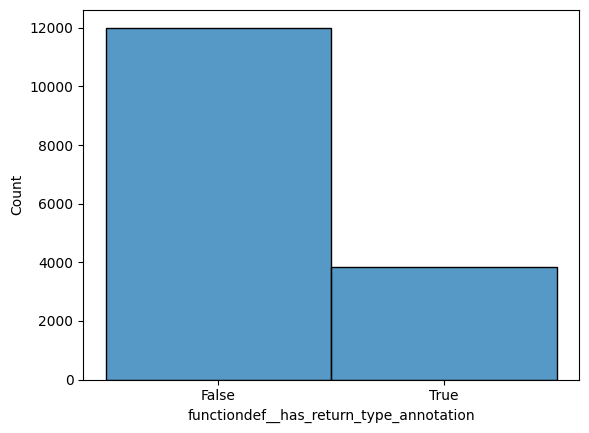

In [22]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [23]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 3852 valores verdaderos y 12005 valores falsos. Y, la desviación típica es de 0.4288613200187683
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.24292110739736394.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.757078892602636.


In [24]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 75.71% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 24.29% de los items.


In [25]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,3852.000000,3852.0,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.0,3852.000000,3852.000000,3852.000000,3852.000000,3852.0,3852.000000,3852.000000,3852.000000,3852.0,3852.000000,3852.000000
mean,20.348909,0.0,0.111371,5.066199,0.185393,0.084372,0.298287,1.0,0.471703,1.212098,0.994985,0.000779,0.0,0.075286,0.000519,0.923416,0.0,0.018172,0.981828
std,10.149992,0.0,0.314631,4.867876,0.221135,0.277981,0.634887,0.0,0.499263,0.636000,0.050435,0.027900,0.0,0.263886,0.022783,0.265964,0.0,0.133592,0.133592
min,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,14.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
50%,19.000000,0.0,0.000000,4.000000,0.125000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,25.000000,0.0,0.000000,6.000000,0.333333,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,87.000000,0.0,1.000000,51.000000,1.000000,1.000000,5.000000,1.0,1.000000,6.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable has_doc_string (5/12)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

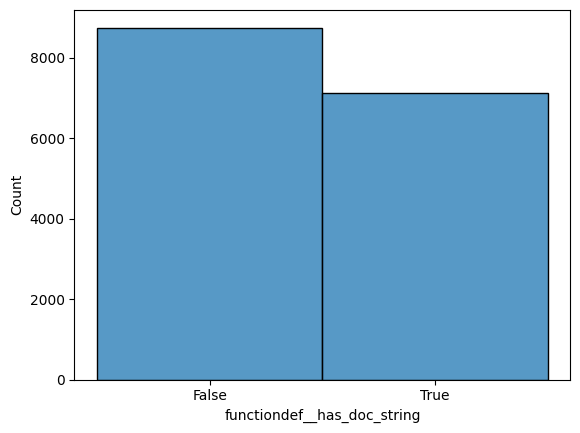

In [26]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [27]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 7113 valores verdaderos y 8744 valores falsos. Y, la desviación típica es de 0.49736377596855164
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.448571608753232.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.551428391246768.


In [28]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 55.14% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 44.86% de los items.


In [29]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,7113.000000,7113.0,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.0,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000
mean,15.445662,0.0,0.042598,5.696612,0.375181,0.010403,0.045129,0.255448,1.0,1.041473,0.260830,0.275552,0.013496,0.124842,0.018558,0.567131,0.000422,0.716294,0.283706
std,7.360564,0.0,0.201963,5.034517,0.214198,0.101473,0.268969,0.436143,0.0,0.271636,0.437548,0.446823,0.115396,0.330563,0.134966,0.495508,0.020534,0.450828,0.450828
min,2.000000,0.0,0.000000,1.000000,0.021277,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.000000,3.000000,0.235294,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.000000,4.000000,0.333333,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,19.000000,0.0,0.000000,7.000000,0.500000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,54.000000,0.0,1.000000,78.000000,1.000000,1.000000,5.000000,1.000000,1.0,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (6/12)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 87. Con una media de 15.08.

<Axes: ylabel='functiondef__number_of_characters'>

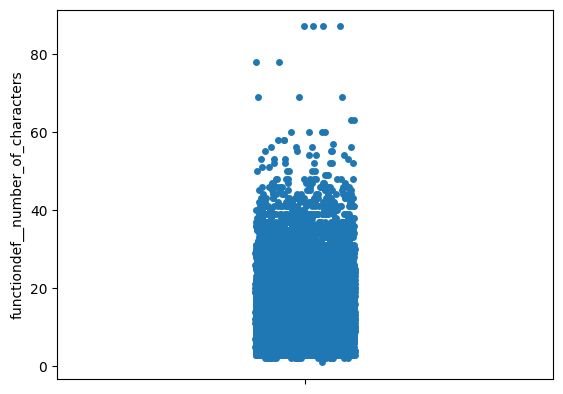

In [30]:
sns.stripplot(X['functiondef__number_of_characters'])

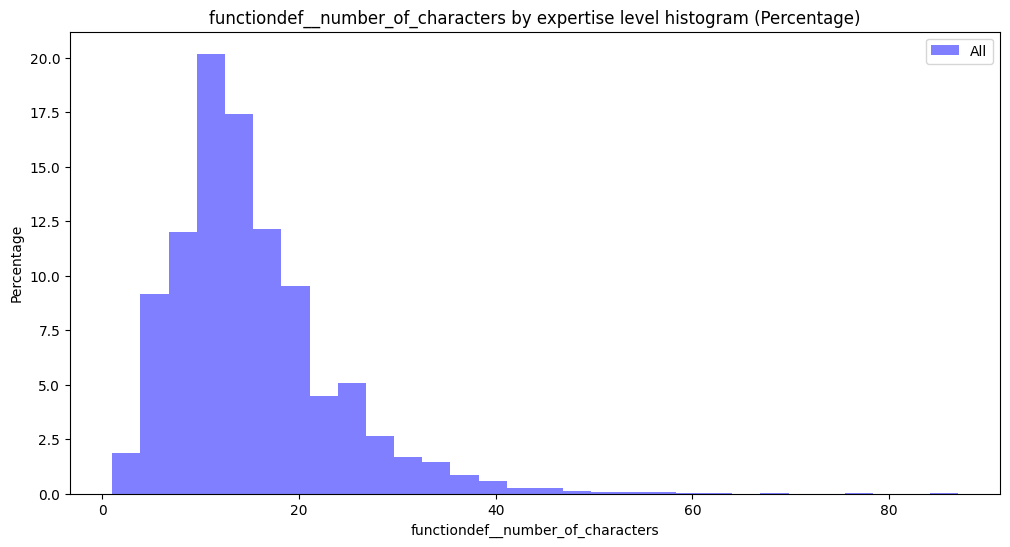

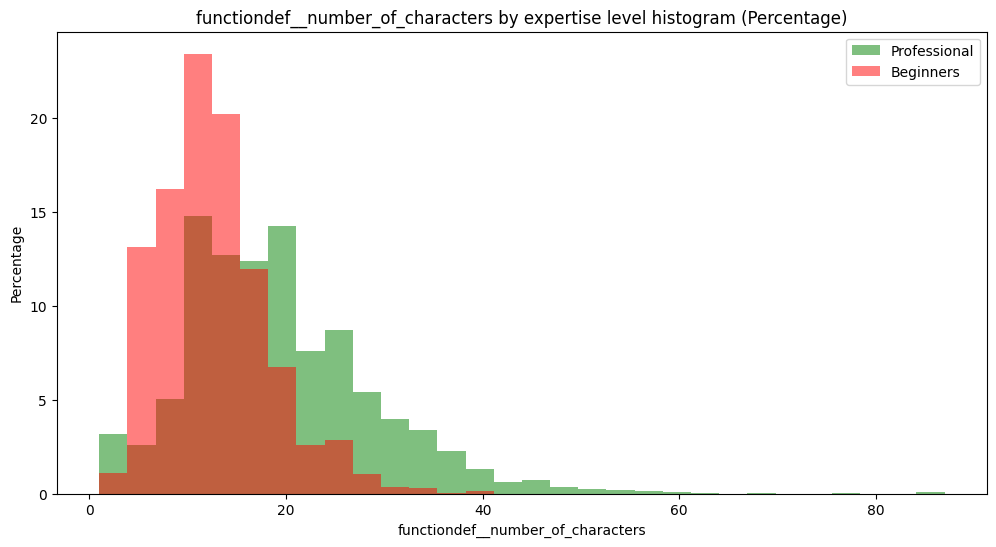

In [31]:
print_histogram(X, 'functiondef__number_of_characters', TABLE_TARGET, bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'functiondef__number_of_characters', TABLE_TARGET, bins=30, include_all=False)

In [32]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7337011015692423
Rango valores atípicos extremos (Tukey): [-17.0,46.0]
Rango valores atípicos leves (Tukey): [-3.5,32.5]
Rango valores atípicos extremos (Fixed BoxPlot): [8.964653834775923,273.040598718768]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -17.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -3.5 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 613 instancias tienen un valor para functiondef__number_of_characters superior a 32.5 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 3.866% del total de instancias.
+3.0IQR: 69 instancias tienen un valor para functiondef__number_of_characters superior a 46.0 (Q3-3*IQR) para functiondef__number_of_characters. Repres

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 46.0 (Con un MC de 73 usamos Tuckey Extremo)

In [60]:
X[X['functiondef__number_of_characters'] > 46].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,69.000000,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.000000,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0
mean,55.666668,0.0,0.014493,6.159420,0.078321,0.130435,0.710145,0.971014,0.202899,1.0,0.985507,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
std,10.405975,0.0,0.120386,4.574942,0.135949,0.339248,1.072400,0.168995,0.405104,0.0,0.120386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,47.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25%,48.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50%,52.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
75%,58.000000,0.0,0.000000,8.000000,0.125000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
max,87.000000,0.0,1.000000,25.000000,0.500000,1.000000,5.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### IMPORTANTE
Todas las funciones con nombres muy largos (>46) son de expertos y en SnakeCase.

### Variable body_count (7/12)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 78. Con una media de 4.957.

<Axes: ylabel='functiondef__body_count'>

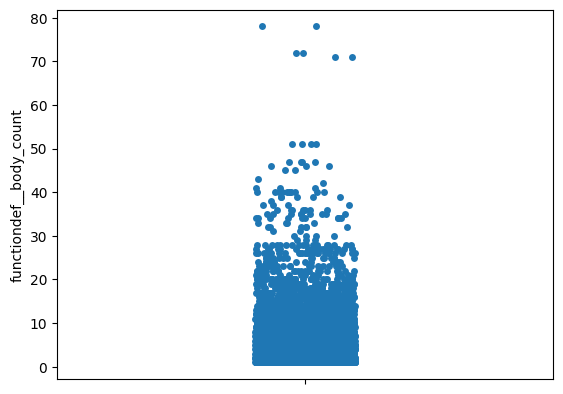

In [34]:
sns.stripplot(X['functiondef__body_count'])

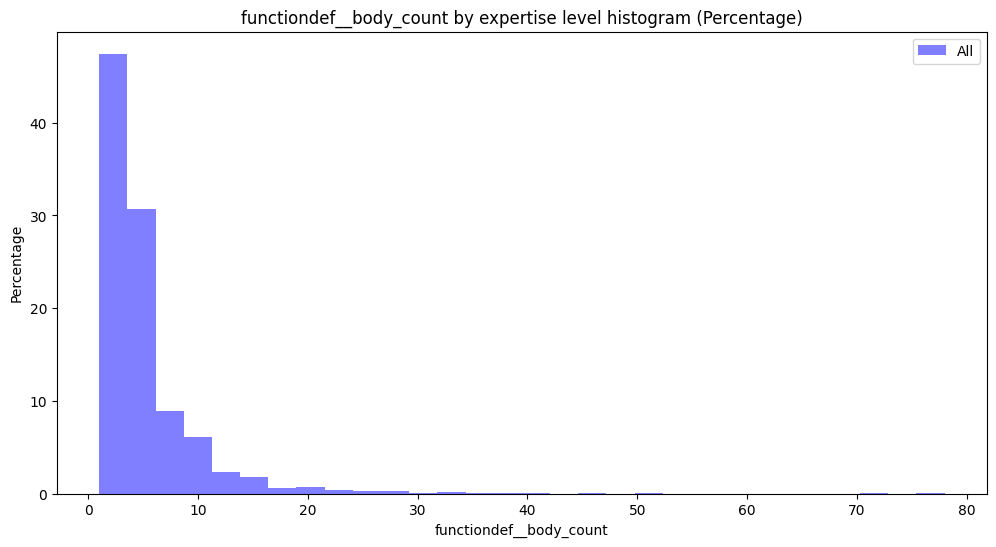

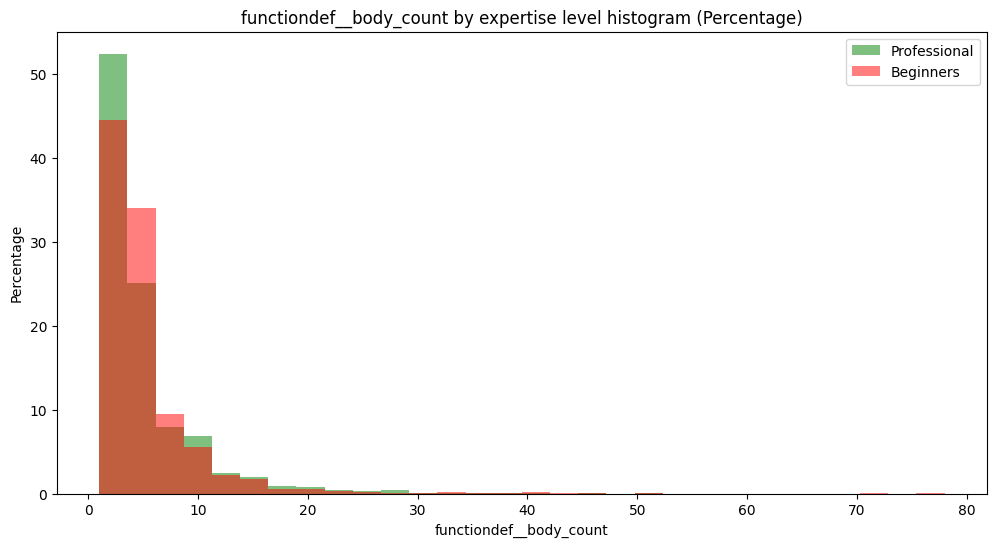

In [35]:
print_histogram(X, 'functiondef__body_count', TABLE_TARGET, bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'functiondef__body_count', TABLE_TARGET, bins=30, include_all=False)

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [36]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8757062851862829
Rango valores atípicos extremos (Tukey): [-10.0,18.0]
Rango valores atípicos leves (Tukey): [-4.0,12.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.720069110340691,205.2548403001361]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -10.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -4.0 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 888 instancias tienen un valor para functiondef__body_count superior a 12.0 (Q3+1.5*IQR) para functiondef__body_count. Representando un 5.6% del total de instancias.
+3.0IQR: 327 instancias tienen un valor para functiondef__body_count superior a 18.0 (Q3-3*IQR) para functiondef__body_count. Representando un 2.062% del total de instancias.
L: 1867 instancias tienen un valor pa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 18.0 (Con un MC de 87 usamos Tuckey Extremo)

In [37]:
X[X['functiondef__body_count'] > 18].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,327.000000,327.0,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.0,327.000000,327.000000
mean,15.125382,0.0,0.033639,27.324160,0.295742,0.030581,0.272171,0.287462,0.562691,1.070336,0.307453,0.232416,0.006116,0.171254,0.024465,0.565749,0.0,0.556575,0.443425
std,8.752889,0.0,0.180575,9.851604,0.265341,0.172444,0.819203,0.453272,0.496814,0.389203,0.457737,0.423020,0.078086,0.377308,0.154724,0.496418,0.0,0.497550,0.497550
min,3.000000,0.0,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,10.000000,0.0,0.000000,20.000000,0.050000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,13.000000,0.0,0.000000,25.000000,0.185185,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000
75%,19.000000,0.0,0.000000,30.500000,0.533937,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000
max,47.000000,0.0,1.000000,78.000000,1.000000,1.000000,7.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable number_of_decorators (8/12)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 10. Con una media de 0.102.

<Axes: ylabel='functiondef__number_of_decorators'>

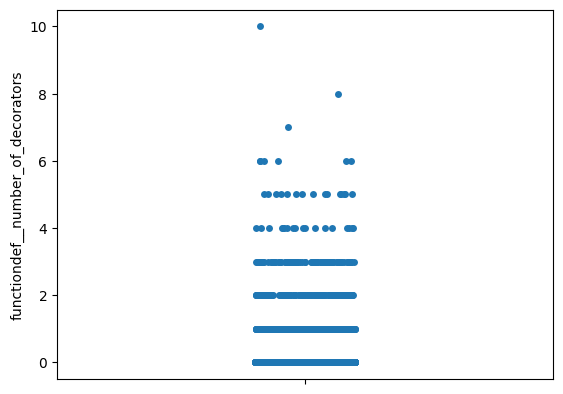

In [38]:
sns.stripplot(X['functiondef__number_of_decorators'])

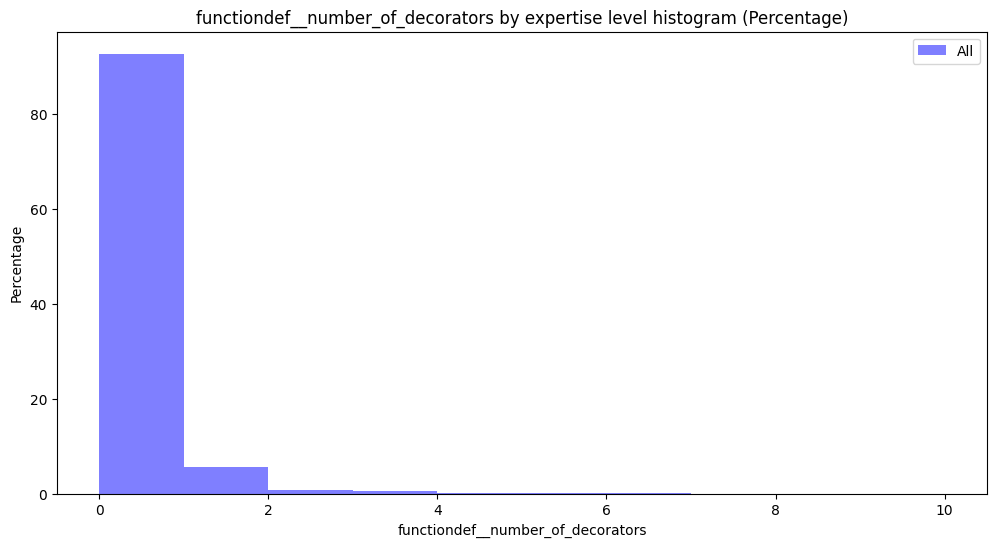

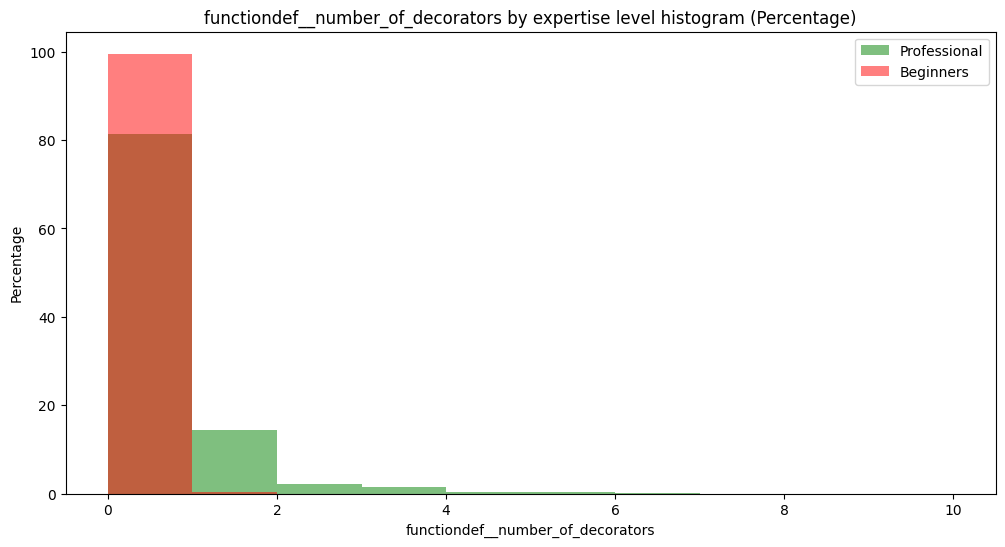

In [39]:
print_histogram(X, 'functiondef__number_of_decorators', TABLE_TARGET, bins=10, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'functiondef__number_of_decorators', TABLE_TARGET, bins=10, include_all=False)

In [40]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8794851028937853
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 1156 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 7.29% del total de instancias.
+3.0IQR: 1156 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 7.29% del total de insta

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [41]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,1156.000000,1156.0,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.0,1156.0,1156.000000,1156.000000,1156.000000,1156.0,1156.000000,1156.000000
mean,20.442041,0.0,0.030277,5.744810,0.163602,0.166090,1.405709,0.758651,0.211938,1.087370,0.791565,0.0,0.0,0.097751,0.001730,0.900519,0.0,0.038927,0.961073
std,10.769088,0.0,0.171422,5.340341,0.239866,0.372322,0.934533,0.428087,0.408858,0.469111,0.403335,0.0,0.0,0.297106,0.041577,0.299436,0.0,0.193506,0.193506
min,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,13.000000,0.0,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
50%,19.000000,0.0,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,25.000000,0.0,0.000000,8.000000,0.250000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,69.000000,0.0,1.000000,32.000000,1.000000,1.000000,10.000000,1.000000,1.000000,7.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable height (9/12)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 7. Con una media de 1.117.

<Axes: ylabel='functiondef__height'>

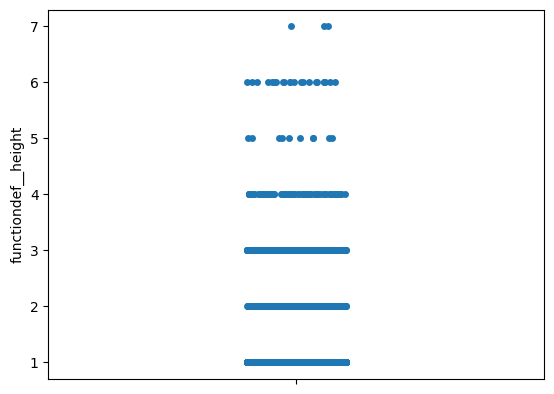

In [42]:
sns.stripplot(X['functiondef__height'])

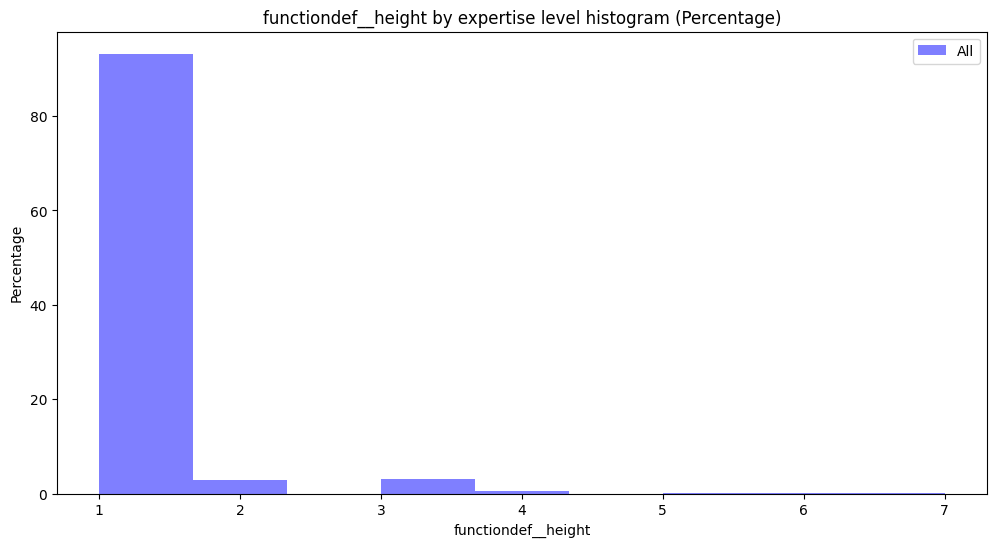

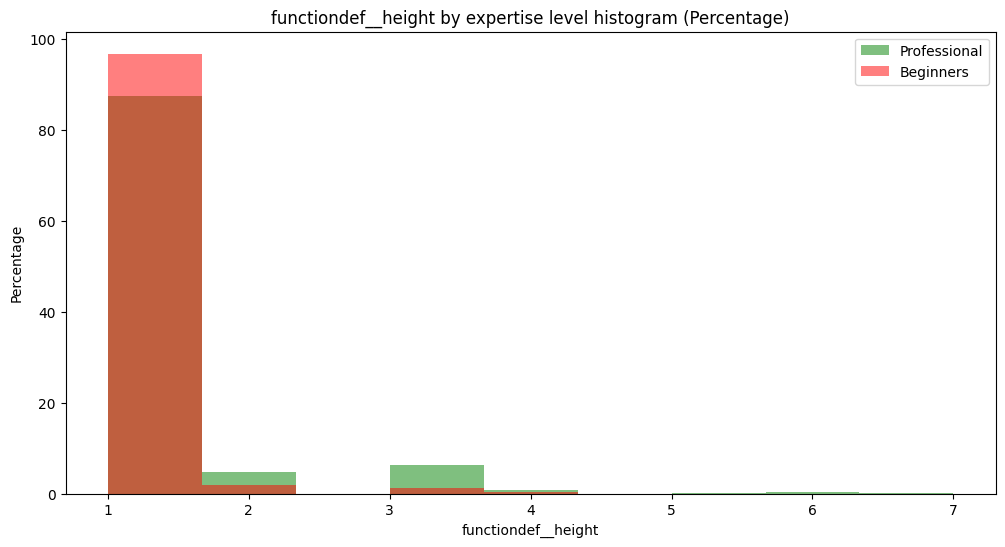

In [43]:
print_histogram(X, 'functiondef__height', TABLE_TARGET, bins=9, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'functiondef__height', TABLE_TARGET, bins=9, include_all=False)

In [44]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 1.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 1.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 1073 instancias tienen un valor para functiondef__height superior a 1.0 (Q3+1.5*IQR) para functiondef__height. Representando un 6.767% del total de instancias.
+3.0IQR: 1073 instancias tienen un valor para functiondef__height superior a 1.0 (Q3-3*IQR) para functiondef__height. Representando un 6.767% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 1.0 para functiondef__height. Representando un 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1.0 (Todos los umbrales son 1)

In [45]:
X[X['functiondef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,1073.000000,1073.0,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.0,1073.000000,1073.000000
mean,11.518173,0.0,0.094129,3.375582,0.182563,0.120224,0.050326,0.440820,0.178006,2.734390,0.444797,0.103448,0.005592,0.338304,0.018639,0.534017,0.0,0.304753,0.695247
std,6.864894,0.0,0.292144,3.614291,0.297942,0.325375,0.218719,0.496717,0.382696,0.842715,0.492682,0.304686,0.074604,0.473353,0.135311,0.499074,0.0,0.460517,0.460517
min,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,6.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,11.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,16.000000,0.0,0.000000,4.000000,0.333333,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,1.000000
max,36.000000,0.0,1.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable expressions_pct (10/12)
Esta variable representa la proporción de las sentencias en el root de la funcion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.239.

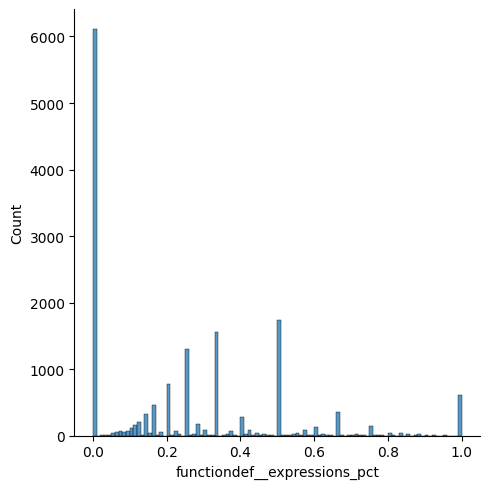

In [46]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

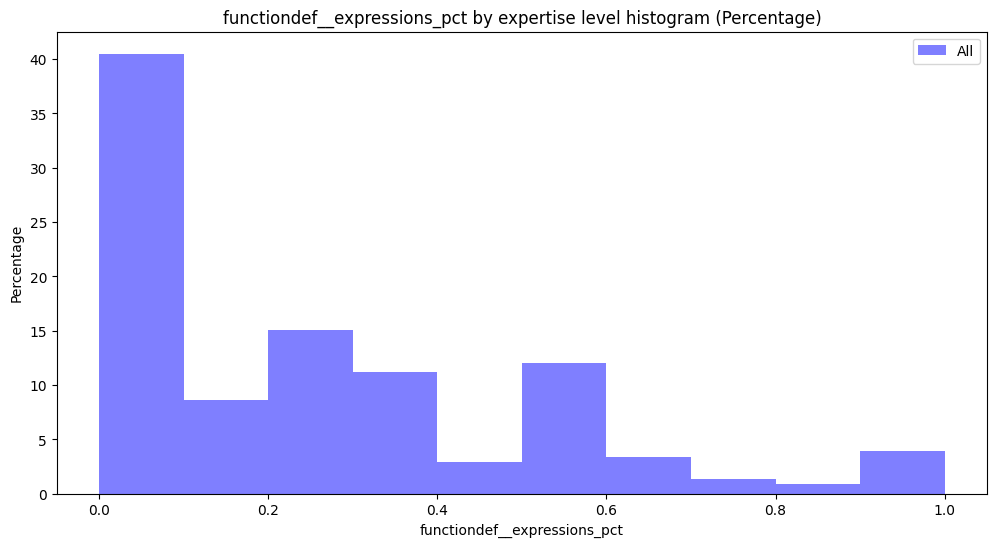

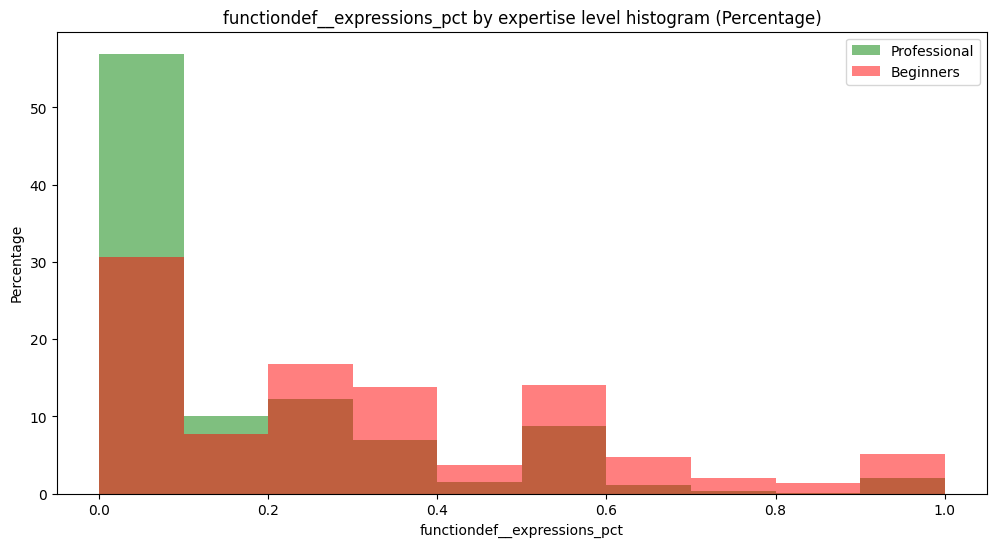

In [47]:
print_histogram(X, 'functiondef__expressions_pct', TABLE_TARGET, bins=10, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'functiondef__expressions_pct', TABLE_TARGET, bins=10, include_all=False)

In [48]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.49800506234169006
Rango valores atípicos extremos (Tukey): [-1.125,1.5]
Rango valores atípicos leves (Tukey): [-0.5625,0.9375]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.09843273444715642,4.498309445806493]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.125 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.5625 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 613 instancias tienen un valor para functiondef__expressions_pct superior a 0.9375 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 3.866% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior a 1.5 (Q3-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.9375 (Con un MC de 49 usamos Tuckey)

In [61]:
X[X['functiondef__expressions_pct'] > 0.9375].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,613.000000,613.0,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.0,613.000000,613.000000
mean,12.055465,0.0,0.006525,3.344209,0.999852,0.014682,0.119086,0.130506,0.504078,1.228385,0.137031,0.228385,0.070147,0.220228,0.039152,0.442088,0.0,0.807504,0.192496
std,6.022305,0.0,0.080581,4.162227,0.002594,0.120374,0.498866,0.337134,0.500392,0.716320,0.344161,0.420135,0.255603,0.414739,0.194114,0.497040,0.0,0.394582,0.394582
min,3.000000,0.0,0.000000,1.000000,0.954545,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,8.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,11.000000,0.0,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,15.000000,0.0,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000
max,40.000000,0.0,1.000000,47.000000,1.000000,1.000000,5.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable type_annotations_pct (11/12)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.2497.

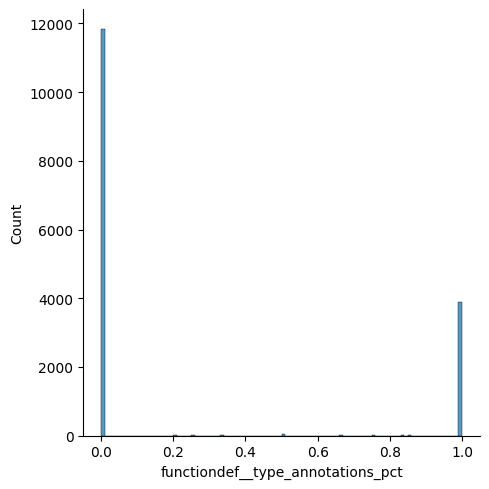

In [50]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

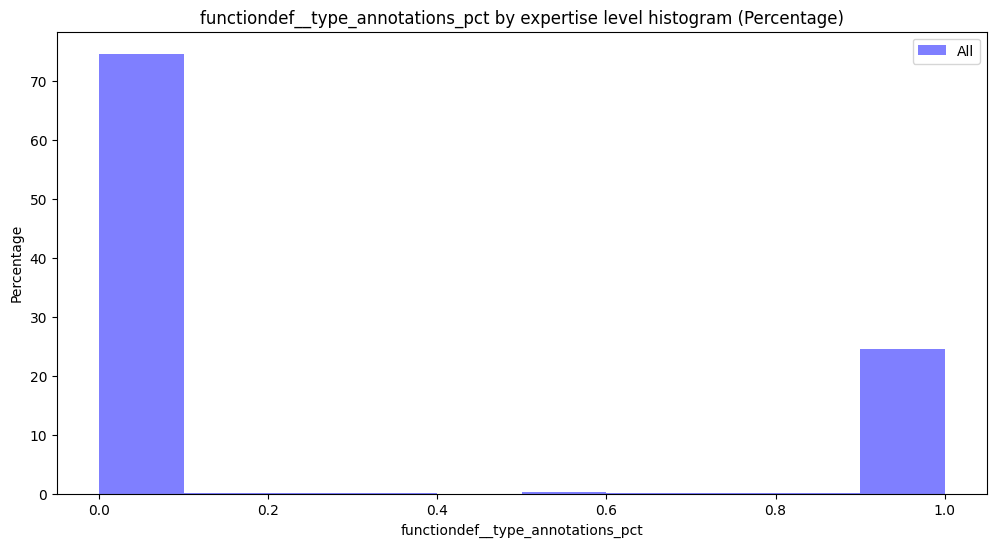

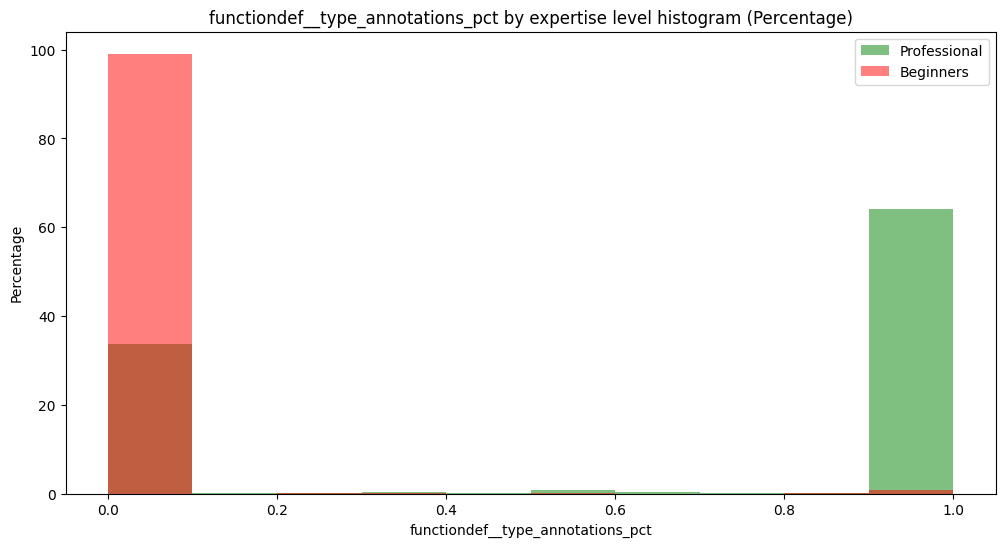

In [51]:
print_histogram(X, 'functiondef__type_annotations_pct', TABLE_TARGET, bins=10, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'functiondef__type_annotations_pct', TABLE_TARGET, bins=10, include_all=False)

In [52]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.29809149784998695
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.26421230460025064,2.9711507156841]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -1.5 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -0.75 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 1.25 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 2.0 (Q3-3*IQR) para functiondef__type_annotations_pct. Representa

Esta variable sigue una distribución en forma de U (Distribución de Laplace) por lo que los valores anómalos se encontrarían en el medio

In [65]:
X[(X['functiondef__type_annotations_pct'] > 0.0) & (X['functiondef__type_annotations_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_PROFESSIONAL
count,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000
mean,17.474821,0.0,0.208633,6.143885,0.103369,0.014388,0.143885,0.302158,0.330935,1.208633,0.521469,0.021583,0.007194,0.050360,0.028777,0.892086,0.0,0.100719,0.899281
std,6.848602,0.0,0.407801,6.145060,0.144735,0.119517,0.443327,0.460854,0.472252,0.531266,0.199752,0.145842,0.084819,0.219477,0.167784,0.311393,0.0,0.302045,0.302045
min,6.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,12.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.346667,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
50%,17.000000,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,21.500000,0.0,0.000000,7.500000,0.189286,0.000000,0.000000,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,43.000000,0.0,1.000000,33.000000,0.500000,1.000000,3.000000,1.000000,1.000000,3.000000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable name_convention (12/12)
Esta variable es de tipo categórica y representa la name_convention del nombre de la funcion.

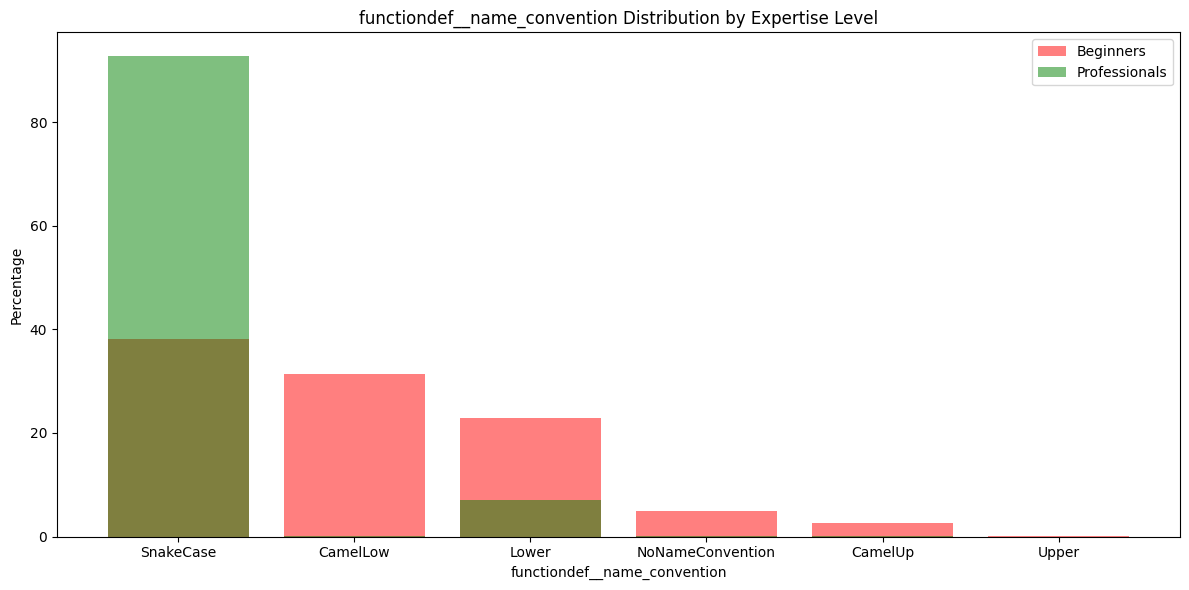

In [54]:
print_categorical_histogram(full_table, 'functiondef__name_convention',TABLE_TARGET, include_all=False)

In [55]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable functiondef__name_convention toma el valor de SnakeCase en un 58.62% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 19.59% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 16.96% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 3.109% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 1.696% de los items.
La variable functiondef__name_convention toma el valor de Upper en un 0.01892% de los items. [OUTLIER]


In [56]:
print_values_usage_for_cat_var(full_table, 'functiondef__name_convention', NAMING_CONVENTION_VALUES)

La variable functiondef__name_convention puede tomar 7 valores distintos
	6 (85.71%) valores utilizados
	1 (14.29%) valores NO utilizados
		La variable functiondef__name_convention nunca toma valor Discard.


## Multivariate

Isolation forest algorithm

In [57]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,functiondef_id,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__expertise_level
2095,1017940,SnakeCase,46,False,False,11,0.363636,True,4,False,False,1,1.0,PROFESSIONAL
2097,1017787,SnakeCase,32,False,False,10,0.400000,True,4,False,False,1,1.0,PROFESSIONAL
2099,1017609,SnakeCase,50,False,False,10,0.300000,True,5,False,False,1,1.0,PROFESSIONAL
2101,1017508,SnakeCase,36,False,False,10,0.300000,True,5,False,False,1,1.0,PROFESSIONAL
3691,744801,Lower,4,False,False,4,0.250000,True,0,True,True,2,1.0,PROFESSIONAL
3694,742836,Lower,4,False,False,4,0.250000,True,0,True,True,2,1.0,PROFESSIONAL
3696,742098,Lower,4,False,False,4,0.250000,True,0,True,True,2,1.0,PROFESSIONAL
4108,658897,SnakeCase,53,False,False,10,0.000000,True,3,True,False,1,1.0,PROFESSIONAL
4109,658659,SnakeCase,17,False,False,26,0.000000,True,3,True,False,1,1.0,PROFESSIONAL
4113,658390,SnakeCase,69,False,False,9,0.000000,True,3,True,False,1,1.0,PROFESSIONAL


### IMPORTANTE
Hay que analizar los 55 los outliers de la tabla.

In [58]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
functiondef__number_of_characters,19.0,35.578949,22.684589,4.0,17.0,36.0,53.00,69.0
functiondef__is_magic,19.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
functiondef__is_private,19.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
functiondef__body_count,19.0,11.368421,7.514508,4.0,6.5,10.0,10.50,26.0
functiondef__expressions_pct,19.0,0.137560,0.153695,0.0,0.0,0.0,0.25,0.4
functiondef__is_async,19.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
functiondef__number_of_decorators,19.0,2.684211,1.565341,0.0,3.0,3.0,3.00,5.0
functiondef__has_return_type_annotation,19.0,0.789474,0.418854,0.0,1.0,1.0,1.00,1.0
functiondef__has_doc_string,19.0,0.210526,0.418854,0.0,0.0,0.0,0.00,1.0
functiondef__height,19.0,1.210526,0.418854,1.0,1.0,1.0,1.00,2.0


In [59]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
functiondef__number_of_characters,15838.0,15.063519,8.067469,1.0,10.0,14.0,19.000,87.0
functiondef__is_magic,15838.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0
functiondef__is_private,15838.0,0.042682,0.202146,0.0,0.0,0.0,0.000,1.0
functiondef__body_count,15838.0,4.949425,4.766695,1.0,2.0,4.0,6.000,78.0
functiondef__expressions_pct,15838.0,0.238976,0.263224,0.0,0.0,0.2,0.375,1.0
functiondef__is_async,15838.0,0.025129,0.156523,0.0,0.0,0.0,0.000,1.0
functiondef__number_of_decorators,15838.0,0.099381,0.432001,0.0,0.0,0.0,0.000,10.0
functiondef__has_return_type_annotation,15838.0,0.242265,0.428468,0.0,0.0,0.0,0.000,1.0
functiondef__has_doc_string,15838.0,0.448857,0.497393,0.0,0.0,0.0,1.000,1.0
functiondef__height,15838.0,1.117250,0.487727,1.0,1.0,1.0,1.000,7.0
